# Compute and R=DV factorization

[R = DV factorization](https://dl.acm.org/doi/10.1145/1137856.1137877) is a standard tool to compute persistent homology.  This notebook computes an R = DV factorization with OAT, then exports the matrices to Scipy sparse CSR matrices.

In [30]:
import oatpy as oat

import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Generate a point cloud

In [31]:
cloud               =   oat.point_cloud.spiral_sphere(npoints=30, noise_scale=0.07, random_seed=0)

#   PLOT THE POINT CLOUD
trace               =   go.Scatter3d(x=cloud[:,0],y=cloud[:,1],z=cloud[:,2], mode="markers", marker=dict(opacity=1, size=4, color=cloud[:,2], colorscale="Aggrnyl"))
fig                 =   go.Figure(data=trace)
fig.update_layout(title=dict(text="Shere"), height=800,width=850) 
fig.show()

# Compute persistent homology

We compute persistent homology by factoring the boundary matrix.  The following cell generates a sparse distance matrix and feeds it to the persistent homology solver.  The result is a factored boundary matrix.  We will extract information from this matrix in the following cells.

In [32]:

# the minimum enclosing radius; all homology vanishes above this filtration parameter
enclosing               =   oat.dissimilarity.enclosing_from_cloud(cloud)   

# distance matrix with values over enclosing + 0.0000000001 removed; adding 0.0000000001 avoids problems due to numerical error
dissimilairty_matrix    =   oat.dissimilarity.matrix_from_cloud(            
                                cloud                   =   cloud,
                                dissimilarity_max       =   enclosing + 0.00000000001,
                            )

# build and factor the boundary matrix
factored                =   oat.rust.FactoredBoundaryMatrixVr( 
                                dissimilarity_matrix    =   dissimilairty_matrix,
                                homology_dimension_max  =   2,
                            )

# Export R = DV decomposition to Scipy

Text(0.5, -0.2, 'V')

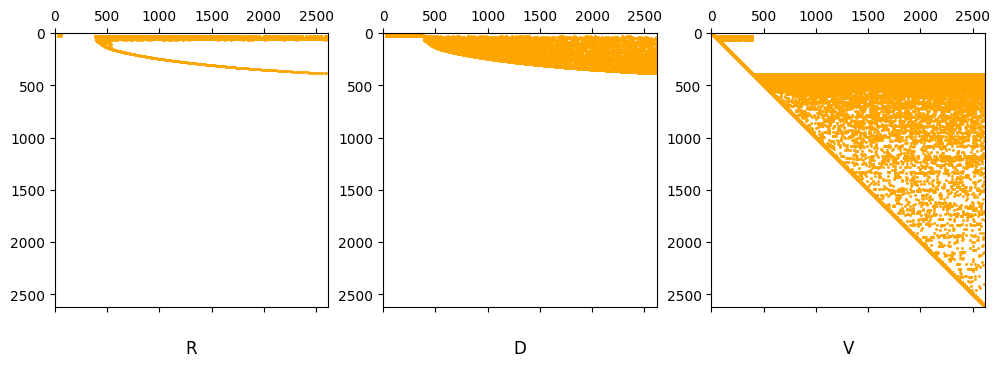

In [33]:
#   Export scipy.sparse.csr_matrix objects
V                   =   factored.comb_domain()
D                   =   factored.boundary_matrix()

#   Scipy has limited functionality for coefficients of type Fraction, so convert to float
V.data              =   V.data.astype(float)
D.data              =   D.data.astype(float)

#   plot sparsity patterns
fig, axs = plt.subplots(1,3)
fig.set_figwidth(12)


axs[0].spy(D * V,   precision=0, marker=None, markersize=1, color="orange", aspect='equal', origin='upper')
axs[1].spy(D,       precision=0, marker=None, markersize=1, color="orange", aspect='equal', origin='upper')
axs[2].spy(V,       precision=0, marker=None, markersize=1, color="orange", aspect='equal', origin='upper')
axs[0].set_title("R", y=-0.2)
axs[1].set_title("D", y=-0.2)
axs[2].set_title("V", y=-0.2)


# Print the simplex corresponding to each row and column

In [34]:
indices         =   factored.indices_boundary_matrix()
display(indices)

simplex  filtration
0              [0]    0.000000
1              [1]    0.000000
2              [2]    0.000000
3              [3]    0.000000
4              [4]    0.000000
...            ...         ...
2612  [18, 20, 25]    1.673846
2613  [18, 20, 26]    1.673846
2614  [18, 20, 27]    1.673846
2615  [18, 20, 28]    1.673846
2616  [18, 20, 29]    1.673846

[2617 rows x 2 columns]